In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats("svg")

C:\Users\Admin\AppData\Local\Temp\ipykernel_7632\2188477860.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats("svg")


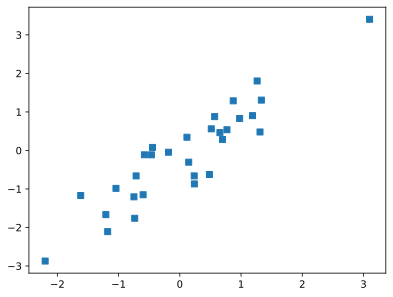

In [2]:
# create data

N = 30
x = torch.randn(N, 1)
y = x + torch.randn(N, 1)/2

# and plot
plt.plot(x, y, "s")
plt.show()

In [5]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1, 1), # input layer; (1, 1) = takes one input(x) and produces one output(input of 2nd linear function) 
    nn.ReLU(), # activation function
    nn.Linear(1, 1) # output layer (1, 1) = takes one input(output  of first linear function) and produces one output(y)
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [7]:
# learning rate
learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimizer (the flavor of gradient descent to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(), lr = learningRate)

In [8]:
# train the model
numepochs = 500
losses = torch.zeros(numepochs)

# train the model
for epochi in range(numepochs):

    # forward pass
    yHat = ANNreg(x)

    # compute loss
    loss = lossfun(yHat, y)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

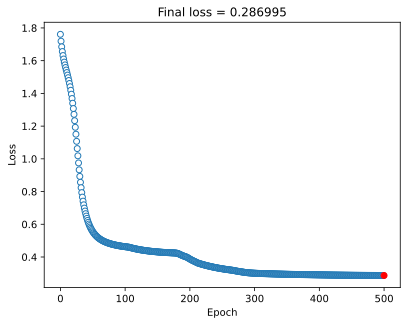

In [9]:
# show the losses

# manually compute losses
# final forward pass
predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions - y).pow(2).mean()

plt.plot(losses.detach(), "o", markerfacecolor = "w", linewidth = .1)
plt.plot(numepochs, testloss.detach(), "ro")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Final loss = %g" %testloss.item())
plt.show()

In [10]:
testloss.item()

0.2869945466518402

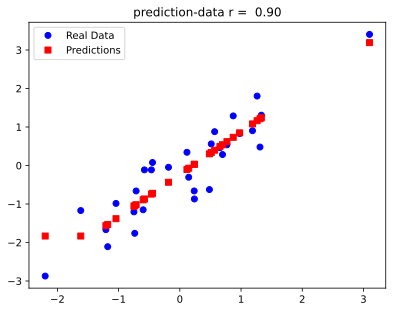

In [11]:
# plot the data
plt.plot(x, y, "bo", label = "Real Data")
plt.plot(x, predictions.detach(), "rs", label = "Predictions")
plt.title(f"prediction-data r = {np.corrcoef(y.T, predictions.detach().T)[0, 1]: .2f}")
plt.legend()
plt.show()